## Solving the Frog Puzzle

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.path.abspath("."), os.pardir)))

import itertools
from collections import defaultdict
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

from rl.distributions import Categorical, Constant, FiniteDistribution
from rl.markov_process import FiniteMarkovProcess, NonTerminal

In [2]:
@dataclass(frozen=True)
class State:
    position: int


class FrogPuzzle(FiniteMarkovProcess[State]):
    def __init__(self, width: int) -> None:
        self.width = width
        logger.info(f"Setting up the Frog Puzzle with width {self.width}")

        super().__init__(transition_map=self.compute_transition_map())

    def compute_transition_map(self) -> dict[State, FiniteDistribution[State]]:
        distribution: dict[State, FiniteDistribution[State]] = defaultdict(float)

        for current_position in range(0, self.width):
            distribution[State(position=current_position)] = Categorical(
                {
                    State(position=next_position): 1.0
                    for next_position in range(current_position + 1, self.width + 1)
                }
            )

        return distribution

In [3]:
W = 5

puzzle = FrogPuzzle(width=W)

# print out the transition probabilities
print(puzzle)

2025-11-22 22:27:24.152 | INFO     | __main__:__init__:9 - Setting up the Frog Puzzle with width 5


From State State(position=0):
	To State State(position=1) with Probability 0.200
	To State State(position=2) with Probability 0.200
	To State State(position=3) with Probability 0.200
	To State State(position=4) with Probability 0.200
	To Terminal State State(position=5) with Probability 0.200
From State State(position=1):
	To State State(position=2) with Probability 0.250
	To State State(position=3) with Probability 0.250
	To State State(position=4) with Probability 0.250
	To Terminal State State(position=5) with Probability 0.250
From State State(position=2):
	To State State(position=3) with Probability 0.333
	To State State(position=4) with Probability 0.333
	To Terminal State State(position=5) with Probability 0.333
From State State(position=3):
	To State State(position=4) with Probability 0.500
	To Terminal State State(position=5) with Probability 0.500
From State State(position=4):
	To Terminal State State(position=5) with Probability 1.000



In [4]:
traces = [
    sum(
        1
        for _ in itertools.islice(
            puzzle.simulate(
                start_state_distribution=Constant(value=NonTerminal(State(position=0)))
            ),
            # skipping 1st position bc that's always the beginning
            # position and we want the expected # of steps
            1,
            None,
        )
    )
    for _ in range(100_000)
]

In [5]:
print(f"Expected number of steps taken: {np.mean(traces):.3f}")

Expected number of steps taken: 2.284


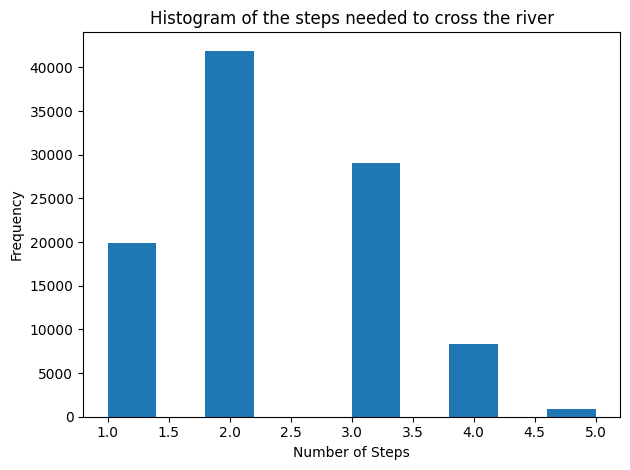

In [6]:
plt.hist(traces)

plt.title("Histogram of the steps needed to cross the river")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()